# Create a k means clustering algorithm to group the customers of retail store based on their purchase history-(Task-2)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


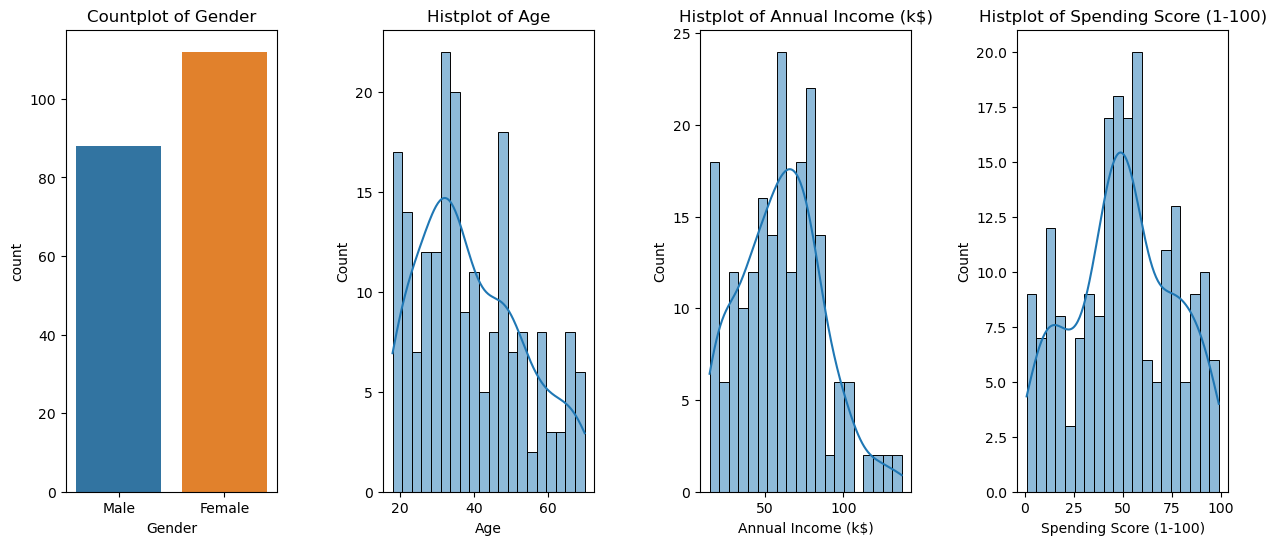

In [9]:
plt.figure(1, figsize=(15, 6))
n = 0

for x in ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 4, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

    if df[x].dtype == 'O': 
        sns.countplot(data=df, x=x)
        plt.title('Countplot of {}'.format(x))
    else:
        sns.histplot(df[x], bins=20, kde=True)  
        plt.title('Histplot of {}'.format(x))

plt.show()


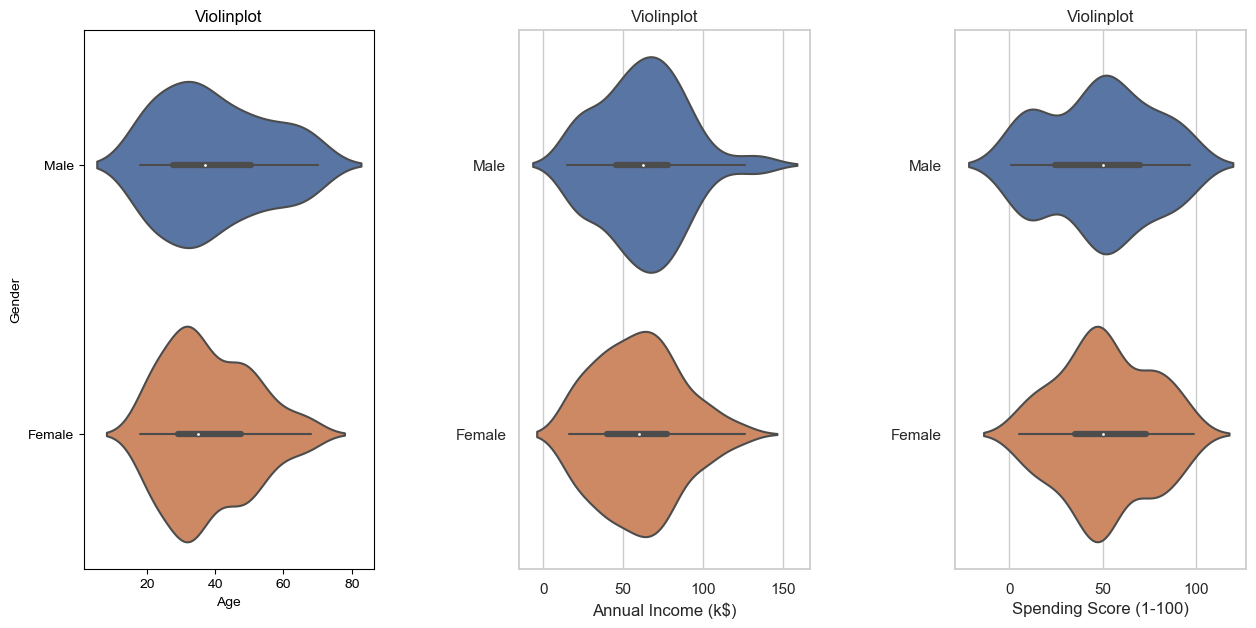

In [10]:
plt.figure(1, figsize=(15, 7))
n = 0

for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

    sns.violinplot(x=cols , y='Gender' , data=df)  # Swap x and y
    plt.ylabel('Gender' if n==1 else "")
    plt.title('Violinplot')

plt.show()


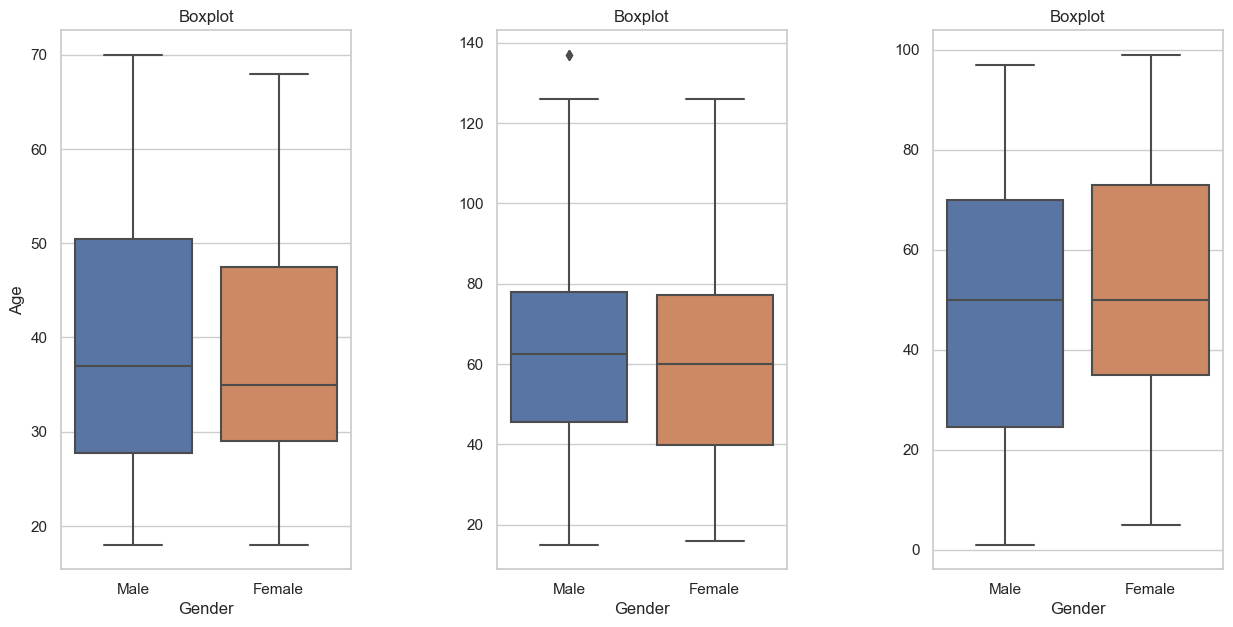

In [11]:
plt.figure(1, figsize=(15, 7))
n = 0

for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

    sns.boxplot(x='Gender', y=cols, data=df)  # Use boxplot instead of violinplot
    plt.ylabel(cols if n == 1 else " ")
    plt.title('Boxplot')

plt.show()


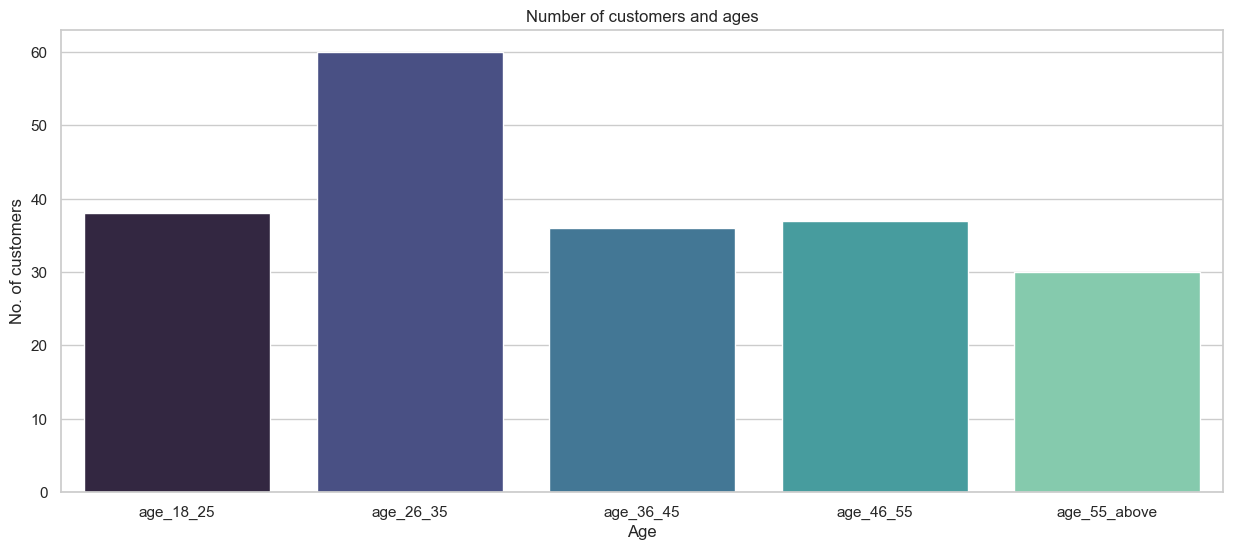

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55_above = df.Age[(df.Age >= 55)]

agex = ["age_18_25", 'age_26_35', 'age_36_45', 'age_46_55', 'age_55_above']
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55_above.values)]

plt.figure(figsize=(15, 6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.xlabel("Age")
plt.ylabel("No. of customers")
plt.title("Number of customers and ages")
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


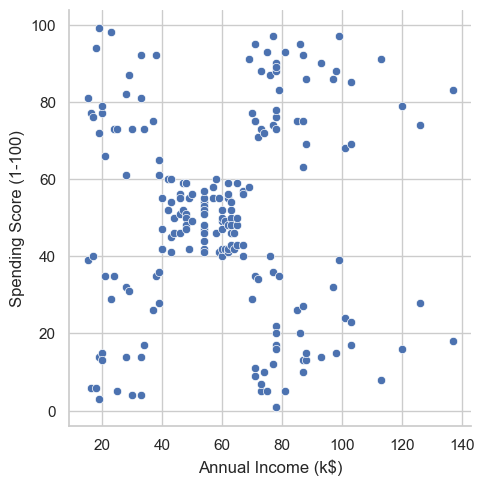

In [13]:
sns.relplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)

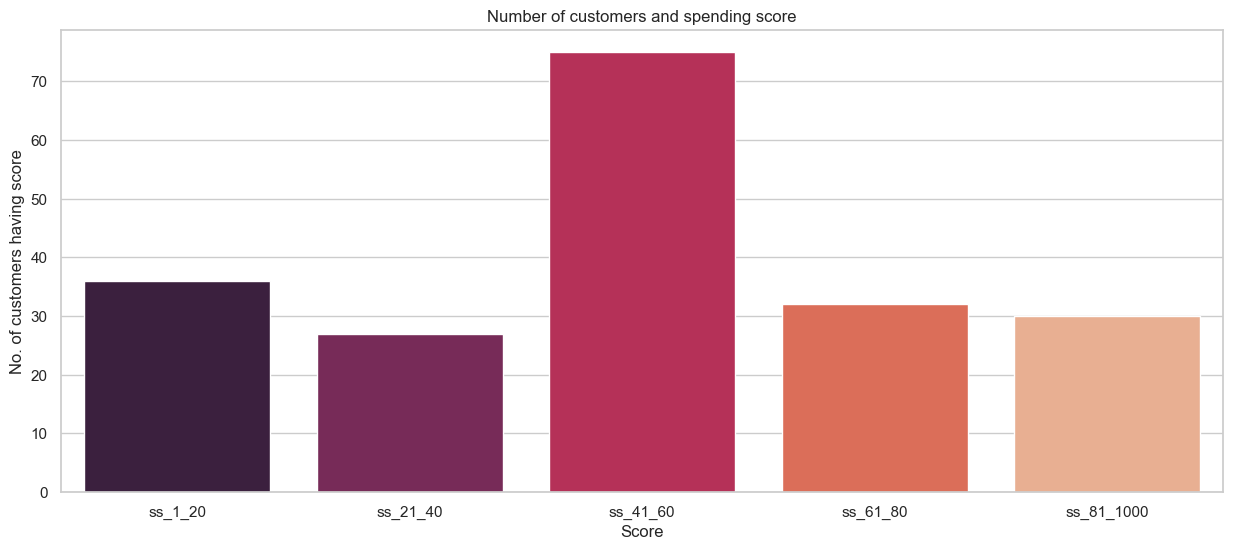

In [14]:
ss_1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)]
ss_21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)]
ss_41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]
ss_61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]
ss_81_1000 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)]

ssx = ["ss_1_20", 'ss_21_40', 'ss_41_60', 'ss_61_80', 'ss_81_1000']
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_1000.values)]

plt.figure(figsize=(15, 6))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.xlabel("Score")
plt.ylabel("No. of customers having score")
plt.title("Number of customers and spending score")
plt.show()


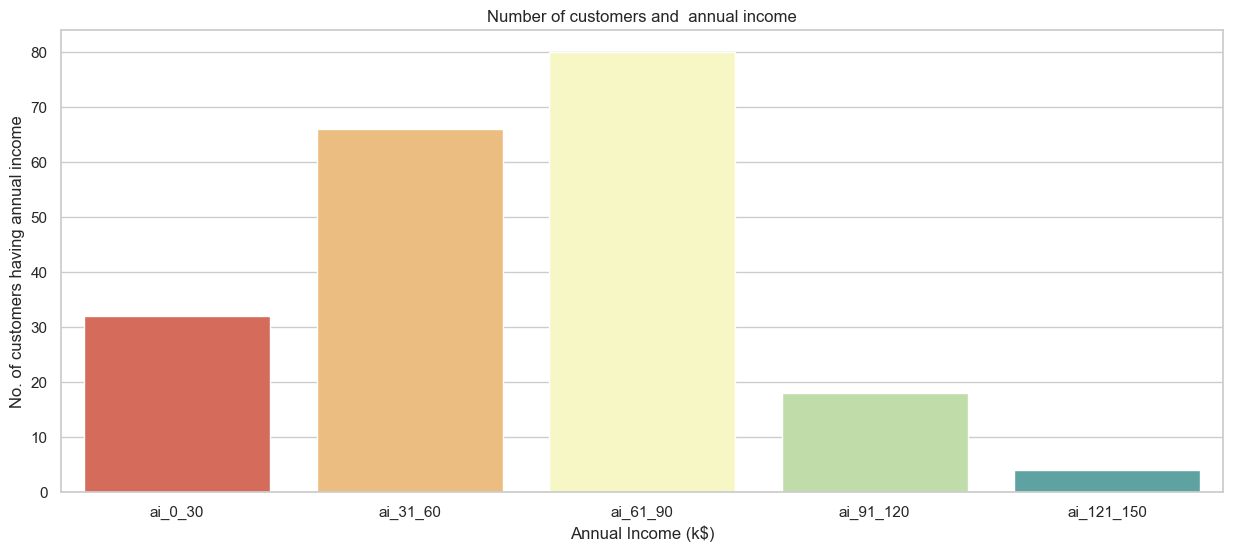

In [15]:
ai_0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 1) & (df['Annual Income (k$)'] <= 30)]
ai_31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31) & (df['Annual Income (k$)'] <= 60)]
ai_61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61) & (df['Annual Income (k$)'] <= 90)]
ai_91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 91) & (df['Annual Income (k$)'] <= 120)]
ai_121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 121) & (df['Annual Income (k$)'] <= 150)]

aix = ["ai_0_30", 'ai_31_60', 'ai_61_90', 'ai_91_120', 'ai_121_150']
aiy = [len(ai_0_30.values), len(ai_31_60.values), len(ai_61_90.values), len(ai_91_120.values), len(ai_121_150.values)]

plt.figure(figsize=(15, 6))
sns.barplot(x=aix, y=aiy, palette="Spectral")
plt.xlabel("Annual Income (k$)")
plt.ylabel("No. of customers having annual income")
plt.title("Number of customers and  annual income")
plt.show()


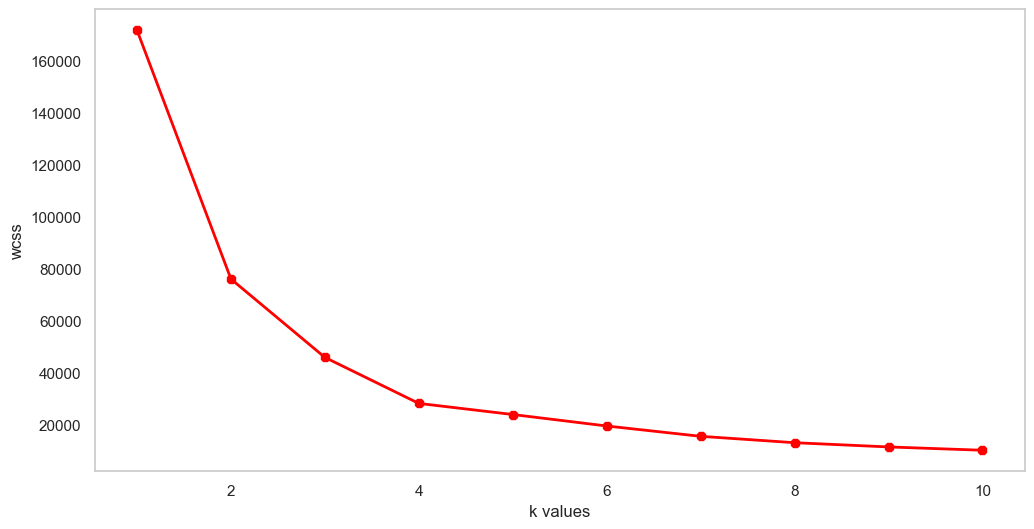

In [16]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

X1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []

for k in range(1, 11):
    
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("k values") 
plt.ylabel("wcss") 
plt.show()


In [17]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
print(label)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[3 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 3 3 1 0 3 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1
 0 1 0 2 0 2 3 1 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 0 3 0 2 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 3 0 1 0 2 0
 1 0 1 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 0 1 0 3
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


In [18]:
print(kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


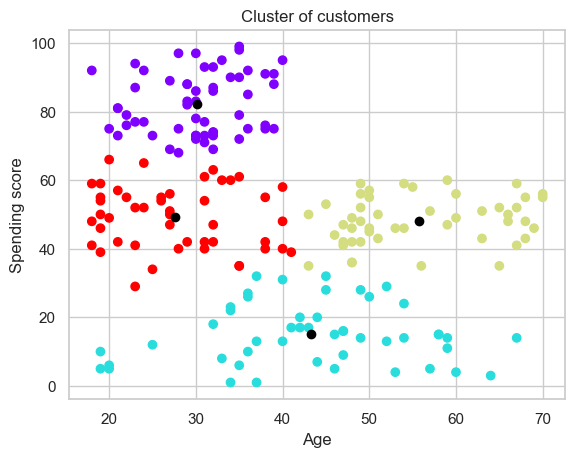

In [19]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black")
plt.title("Cluster of customers")
plt.xlabel("Age")
plt.ylabel("Spending score")
plt.show()

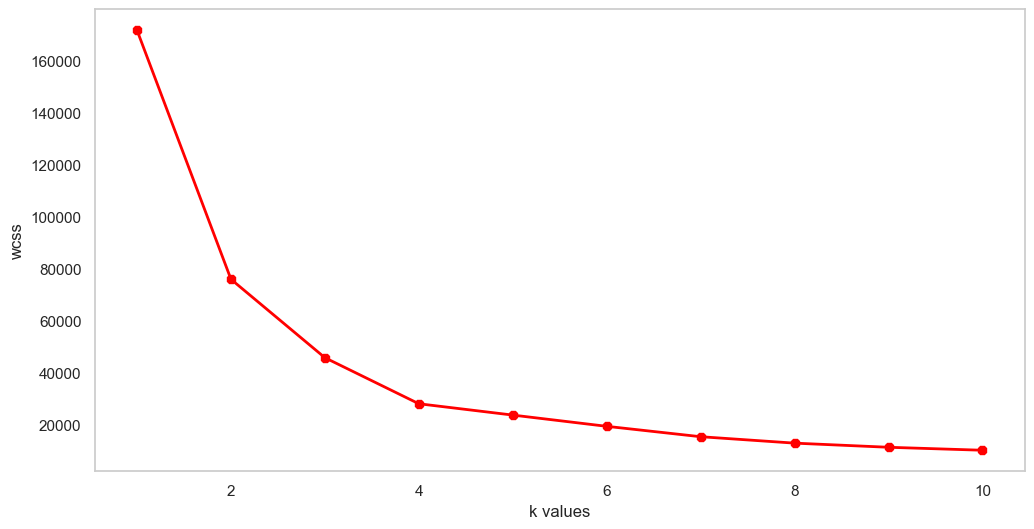

In [20]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

X2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []

for k in range(1, 11):
    
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("k values") 
plt.ylabel("wcss") 
plt.show()


In [21]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(X2)
print(label)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [22]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


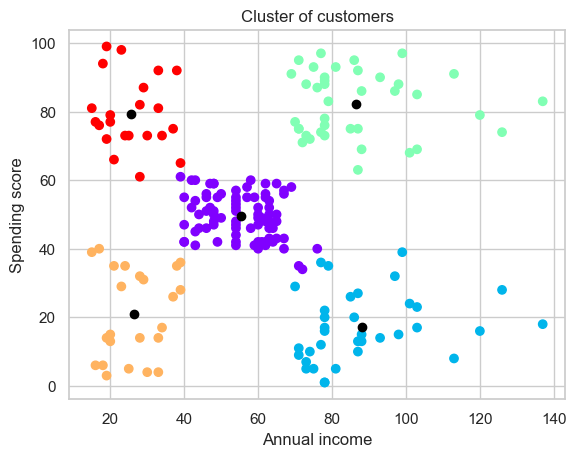

In [23]:
plt.scatter(X2[:,0],X1[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black")
plt.title("Cluster of customers")
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.show()

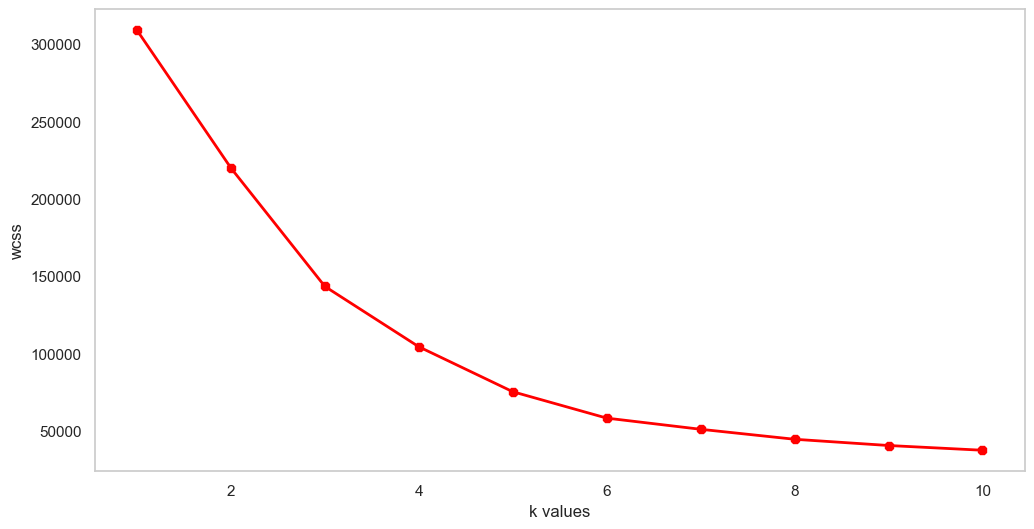

In [24]:

X3 = df.iloc[:,1:]

from sklearn.cluster import KMeans
wcss = []

for k in range(1, 11):
    
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("k values") 
plt.ylabel("wcss") 
plt.show()


In [28]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(X3)
print(label)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [29]:
print(kmeans.cluster_centers_)

[[25.52173913 26.30434783 78.56521739]
 [43.08860759 55.29113924 49.56962025]
 [32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]
 [40.66666667 87.75       17.58333333]]


In [30]:
# plt.scatter(X2[:,0],X1[:,1],c=kmeans.labels_,cmap="rainbow")
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black")
# plt.title("Cluster of customers")
# plt.xlabel("Annual income")
# plt.ylabel("Spending score")
# plt.show()

In [31]:
clusters=kmeans.fit_predict(X3)
df("label")=clusters

from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(10,20))
ax=fig.add.sub_plot(111,projection="3d")
ax.scatter(df.Age[df.label==0]),df["Annual Income (k$)"][df.label==0],c='blue',s=60)
ax.scatter(df.Age[df.label==1]),df["Annual Income (k$)"][df.label==1],c='red',s=60)
ax.scatter(df.Age[df.label==2]),df["Annual Income (k$)"][df.label==2],c='green',s=60)
ax.scatter(df.Age[df.label==3]),df["Annual Income (k$)"][df.label==3],c='orange',s=60)
ax.scatter(df.Age[df.label==4]),df["Annual Income (k$)"][df.label==4],c='purple',s=60)
ax.view_init(30,185)


SyntaxError: unmatched ')' (2542141744.py, line 8)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


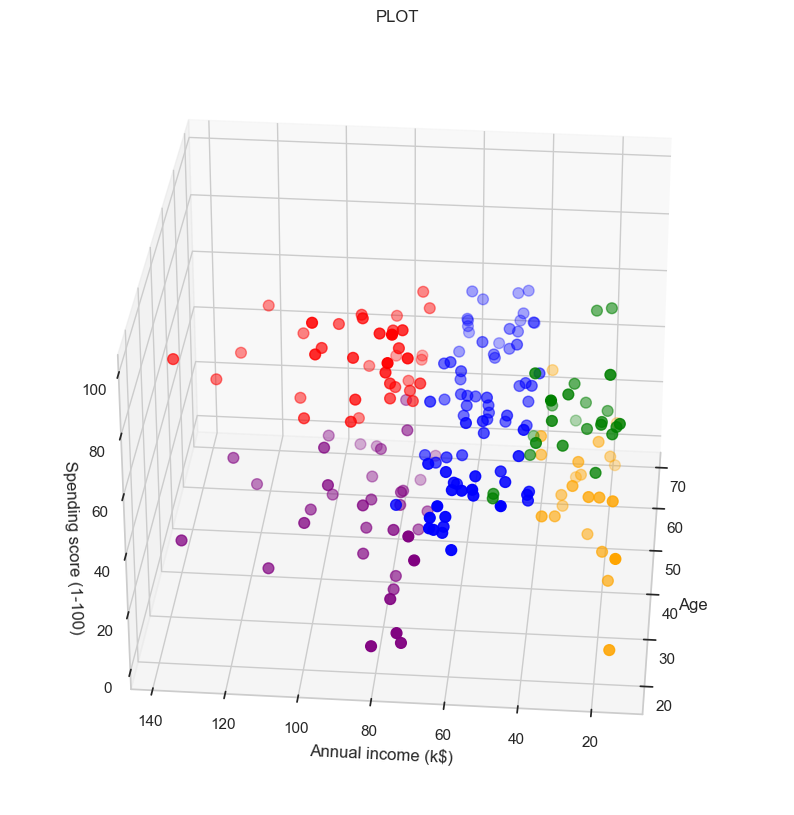

In [37]:
clusters = kmeans.fit_predict(X3)
df["label"] = clusters 

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection="3d") 
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)

plt.title("PLOT")
plt.xlabel("Age")
plt.ylabel("Annual income (k$)")  # Fixing the typo in ylabel
ax.set_zlabel("Spending score (1-100)")
plt.show()
